<span class='note'><i>Make me look good.</i> Click on the cell below and press <kbd>Ctrl</kbd>+<kbd>Enter</kbd>.</span>

In [1]:
from IPython.core.display import HTML
HTML(open('css/custom.css', 'r').read())

<h5 class='prehead'>SM286D &middot; Introduction to Applied Mathematics with Python &middot; Spring 2020 &middot; Uhan</h5>

<h5 class='lesson'>Lesson 14.</h5>

<h1 class='lesson_title'>Working with images in Python</h1>

## This lesson...

- Looking ahead to the next lesson
- Digital images
    - Pixels
    - 8-bit images
    - Base 10 and Base 2
- Images as matrices

---

## Looking ahead to the next lesson

- In the next lesson, we will learn how to perform __steganography__, or the practice of concealing messages or information within other nonsecret text or data.

- In particular, we will learn how to hide a message inside a digital image.

- To do this, though, we first need to learn how to work with digital images!

## Digital images

 - Digital images are really just a collection of picture elements, or __pixels__, as shown below.

<img src="img/pixel.png" alt="Drawing" style="width: 600px;"/>

<center>Figure 1. An example of a digital image made up of pixels.</center>

- Each pixel contains color information for the three primary colors, red, green, and blue.
 
- In an 8-bit image, the total number of shades for each color is $2^8 = 256$.
 
- Figure 2 below shows an example of a pixel and its associated color information stored as 8-bit integers.

<img src="img/pixel_as_8-bit_integer.png" alt="Drawing" style="width: 600px;"/>

<center>Figure 2. 8-bit integer representation of color information in a pixel.</center>

- Before we look at how the 8-bit integer representation of color information works, let's consider a simpler example using Base 10.
 
- Figure 3 below shows how the number 1729 can be written using a Base 10 expansion.

<img src="img/base10.png" alt="Drawing" style="width:600px;padding-bottom:20px"/>

<center>Figure 3. Example using Base 10 to represent a number.</center>

- Using a similar process, we can perform a Base 2 expansion of the 4-bit integer 1001 as shown in Figure 4 below.

- Note that in the binary representation of the 4-Bit integer, a 1 indicates an "On Bit" and a 0 indicates an "Off Bit".

- Based on the expansion below, the Base 10 equivalent of $[1001]_2$ is $1 \times 2^3 + 0 \times 2^2 + 0 \times 2^1 + 1 \times2^0 = 9$.

<img src="img/base2.png" alt="Drawing" style="width:600px;padding-bottom:10px;"/>

<center>Figure 4. Example using Base 2 to represent a number.</center>

- Using a similar process to that shown in Figure 4, we can perform an expansion of the color information originally displayed for the pixel in Figure 2.

- The pixel from Figure 2 is shown in Figure 5 below with the 8-bit integer and equivalent Base 10 color information.

<img src="img/pixel_with_8-bit_and_base_10.png" alt="Drawing" style="width:600px;padding-bottom:20px;"/>

<center>Figure 5. Pixel example from Figure 2 with 8-bit integer and equivalent Base 10 color information.</center>

## Images as matrices

- We can represent the image shown in Figure 6 below as a 3-dimensional NumPy array with dimensions 252 x 447 x 3.

<img src="img/image_matrix_updated.png" alt="Drawing" style="width:600px;padding-bottom:20px;"/>

<center>Figure 6. Representing an image as a NumPy array.</center>

- The code in the cell below reads the image file `GooseIsland.jpg`, stores it in a variable called `goose_island`, and plots it as a Matplotlib figure.

    - _Note._ You may have to run the code twice to get the image to appear.

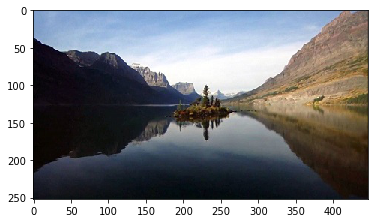

In [2]:
from matplotlib import pyplot as plt
from matplotlib import image as img

# Read the image file called 'GooseIsland.jpg'
# Store image information in variable
goose_island = img.imread('img/GooseIsland.jpg')

# View the image as a Matplotlib figure
plt.imshow(goose_island)

- We can access the information stored in a single pixel of the image like this:

In [3]:
# Get information about pixel 50 rows down from the top of the image
# and 75 columns from the left side of the image
goose_island[50, 75]

array([171, 195, 219], dtype=uint8)

- The resulting array contains the red, green, and blue color information for this pixel, represented as Base 10 numbers.

- The color information is actually stored in memory as __unsigned, 8-bit integers__ as indicated by `dtype=uint8`.
 
- For further information about the uint8 data type, see the [NumPy documentation on its data types](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html).

- We'll come back to why we care about representing the image color information in Base 2 instead of Base 10 in the next lesson.

---

## Classwork

__Problem 1.__
Go through the examples below. The examples demonstrate how images can be represented as $m\times n \times 3$ arrays of numbers between 0 and 255. After this brief introduction, you should be ready to tackle Problem 2. 

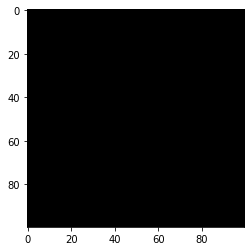

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Start by defining M1 as a 3-dimensional array of size 100x100x3 of 0s
# Resulting image is 100 pixels tall and 100 pixels wide
# The last dimension is size 3, to represent red/green/blue levels
M1 = np.zeros((100, 100, 3), dtype='uint8')

# Since all color levels = 0, we get a black box.
plt.imshow(M1)

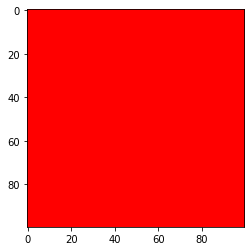

In [5]:
# Start with 100x100x3 array of 0s
M2 = np.zeros((100, 100, 3), dtype='uint8')

# For each pixel, make its red value 255
# Note that we can use slices instead of single indices
# Below, we're changing the value of M2[i, j, 0]
# for i and j both ranging between 0 and 99
M2[0:100, 0:100, 0] = 255

# We get a red box
plt.imshow(M2)

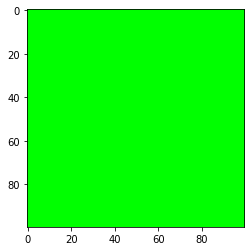

In [6]:
# Similar to above, but with green
# What's different about this code?
M3 = np.zeros((100, 100, 3), dtype='uint8')
M3[0:100, 0:100, 1] = 255
plt.imshow(M3)

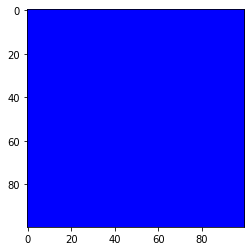

In [7]:
# Similar to above, but with blue
# What's different about this code?
M4 = np.zeros((100, 100, 3), dtype='uint8')
M4[0:100, 0:100, 2] = 255
plt.imshow(M4)

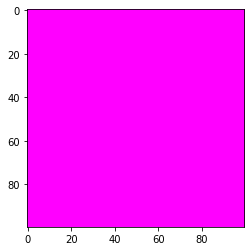

In [8]:
# We can mix colors: red and blue make purple 
M5 = np.zeros((100, 100, 3), dtype='uint8')
M5[0:100, 0:100, 0] = 255  # red
M5[0:100, 0:100, 2] = 255  # blue
plt.imshow(M5)

The code below is a bit more complicated. It draws the flag of Ireland (pictured below).

<img src="img/Flag_of_Ireland.png" alt="Drawing" style="width: 300px;"/>

(-0.5, 299.5, 99.5, -0.5)

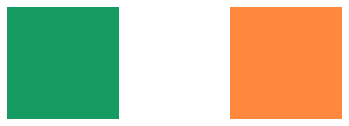

In [9]:
# Ireland
# Green: R: 22, G: 155, B: 98
# White: R: 255, G: 255, B: 255
# Orange: R: 255, G: 136, B: 62

# Start with 100x300x3 array of 0s
ireland = np.zeros((100,300,3),dtype='uint8')

# Green goes in the left third
ireland[0:100, 0:100, 0] = 22
ireland[0:100, 0:100, 1] = 155
ireland[0:100, 0:100, 2] = 98

# White goes in the middle third
ireland[0:100, 100:200, 0] = 255
ireland[0:100, 100:200, 1] = 255
ireland[0:100, 100:200, 2] = 255

# Orange goes in the right third
ireland[0:100, 200:300, 0] = 255
ireland[0:100, 200:300, 1] = 136
ireland[0:100, 200:300, 2] = 62

# Show the resulting image without the axes
plt.imshow(ireland)
plt.axis("off")

_Hint._ For more complex colors, to get the necessary values for red, green, and blue, do a quick Google search for something like "RGB color picker".

__Problem 2.__
Write code to display a $101 \times 101$ white box.

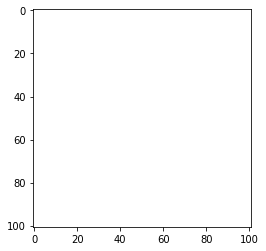

In [10]:
# Solution 1
M6a = 255 * np.ones((101, 101, 3), dtype='uint8')
plt.imshow(M6a)

# Alternate solution
M6 = np.zeros((101, 101, 3), dtype='uint8')
M6[0:101, 0:101, 0] = 255
M6[0:101, 0:101, 1] = 255
M6[0:101, 0:101, 2] = 255
plt.imshow(M6)

__Problem 3.__
Using appropriately sized arrays, display the flags of the following countries:

Italy

<img src="img/Flag_of_Italy.png" alt="Drawing" style="width: 300px;"/>

(-0.5, 299.5, 99.5, -0.5)

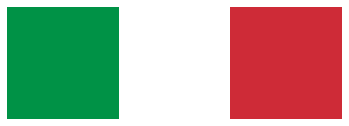

In [11]:
# Italy 
# Green: 0, 146, 70 (R, G, B)
# White: 255, 255, 255
# Red: 206, 43, 55

# Start with 100x300x3 array of 0s
italy = np.zeros((100, 300, 3), dtype='uint8')

# Green goes in the left third
italy[0:100, 0:100, 0] = 0
italy[0:100, 0:100, 1] = 146
italy[0:100, 0:100, 2] = 70

# White goes in the middle third
italy[0:100, 100:200, 0] = 255
italy[0:100, 100:200, 1] = 255
italy[0:100, 100:200, 2] = 255

# Red goes in the right third
italy[0:100, 200:300, 0] = 206
italy[0:100, 200:300, 1] = 43
italy[0:100, 200:300, 2] = 55

# Show the resulting image without the axes
plt.imshow(italy)
plt.axis("off")

Belgium

<img src="img/Flag_of_Belgium.png" alt="Drawing" style="width: 300px;"/>

(-0.5, 299.5, 99.5, -0.5)

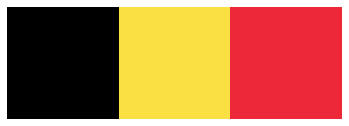

In [12]:
# Belgium
# Black: 0, 0, 0
# Yellow: 250, 224, 66
# Red: 237, 41, 57

# Start with 100x300x3 array of 0s
belgium = np.zeros((100, 300, 3), dtype='uint8')

# Black goes in the left third
belgium[0:100, 0:100, 0] = 0
belgium[0:100, 0:100, 1] = 0
belgium[0:100, 0:100, 2] = 0

# Yellow goes in the middle third
belgium[0:100, 100:200, 0] = 250
belgium[0:100, 100:200, 1] = 224
belgium[0:100, 100:200, 2] = 66

# Red goes in the right third
belgium[0:100, 200:300, 0] = 237
belgium[0:100, 200:300, 1] = 41
belgium[0:100, 200:300, 2] = 57

# Show the resulting image without the axes
plt.imshow(belgium)
plt.axis("off")

Chad

<img src="img/Flag_of_Chad.png" alt="Drawing" style="width: 300px;"/>

(-0.5, 299.5, 99.5, -0.5)

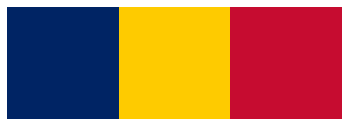

In [13]:
# Chad
# Blue: 0, 36, 100
# Yellow : 254, 203, 0
# Red: 198, 12, 48

# Start with 100x300x3 array of 0s
chad = np.zeros((100, 300, 3), dtype='uint8')

# Blue goes in the left third
chad[0:100, 0:100, 0] = 0
chad[0:100, 0:100, 1] = 36
chad[0:100, 0:100, 2] = 100

# Yellow goes in the middle third
chad[0:100, 100:200, 0] = 254
chad[0:100, 100:200, 1] = 203
chad[0:100, 100:200, 2] = 0

# Red goes in the right third
chad[0:100, 200:300, 0] = 198
chad[0:100, 200:300, 1] = 12
chad[0:100, 200:300, 2] = 48

# Show the resulting image without the axes
plt.imshow(chad)
plt.axis("off")

__Problem 4.__
Write code that fills in the $41\times41$ center of your $101\times101$ white box from Problem 2 with a red box.

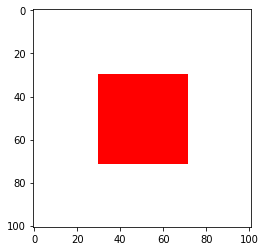

In [14]:
# Create 3D array representing white box
M = 255 * np.ones((101, 101, 3), dtype='uint8')

# Make the center pixels red by making the green and blue values 0. 
# Note the use of the slice `1:` - recall this accesses indices starting at 1 up to the last index.
M[30:72, 30:72, 1:] = 0

# Show the resulting image
plt.imshow(M) 

__Problem 5.__ 
Write code that draws a solid blue disk inscribed in a $101 \times 101$ white box. 

Take some time to think through how you ought to do this question rather than just jumping in to try to code it up. _Hint._ Can you find the distance from `(50, 50)`, the center of the box, to the point `(i, j)`?

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


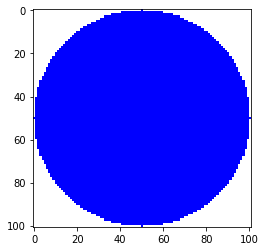

In [15]:
# Distance from (50,50) to (59,62) is ((i - 50)**2 + (j - 50)**2)**(0.5).
# We want to draw a circle of radius 50 centered at (50,50).

# Initialize white box, 101x101 pixels
M = 255 * np.ones((101, 101, 3))

# Loop over all the pixels in the box
# Color the pixel blue if its distance from the center <= 50
# Otherwise, leave the pixel white
for i in range(101):
    for j in range(101):
        distance = ((i - 50)**2 + (j - 50)**2)**(0.5)
        if distance <= 50:
            # Want point to be blue, so turn off green and red
            M[i, j, 0:2] = 0 
            
# Show resulting image
plt.imshow(M)

__Problem 6.__
You should have already imported the `image` subpackage of `matplotlib` as `img`. Use its `imread` command to read in the file `herndon2019.jpg` (in the same folder as this notebook) and store it in the matrix `M`. Display the image to reproduce the image below.

<img src="herndon2019.jpg" alt="Drawing" style="width: 300px;"/>

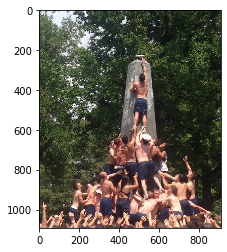

In [16]:
M = img.imread('herndon2019.jpg')
plt.imshow(M)

The matrix `M` is read in to memory in __non-mutable form__ &mdash; that is, we can't change it. But in this question we want to modify the image! 

Here's how to do that. Make a new array `N` that is the same size as `M`. Now set the values of `N` equal to the values of `M` **using the slicing notation** as in the code below.  

(Note that this is similar to thetechnique we used to copy lists -- see PCC page 63.)

In [17]:
# Get dimensions of M
x, y, c = M.shape

# Initialize matrix N to be an array of 0s, same dimension as M
N = np.zeros((x, y, c), dtype='uint8')

# Copy each entry of M to N
N[0:x, 0:y, 0:c] = M[0:x, 0:y, 0:c]

Using the slicing notation allows us to change the values of `N`. If we'd just written `N = M`, then the values of `N` would __point to__ the values of `M`, meaning we wouldn't be able to change the values of `N` either, because that would mean that we'd be changing the values of `M`! 

Now change the values of `N` as follows.

Erase the green layer by setting all of the green values of `N` to zero. Display the new image.

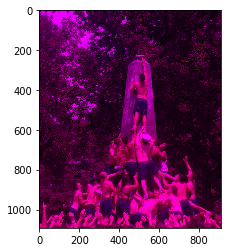

In [18]:
# Erase the green layer
N[0:x, 0:y, 1] = 0

# Display the image without the green layer
plt.imshow(N)

Write the new image to the file `herndon2019-g.jpg` using the code below.

In [19]:
# Create a figure object
f = plt.figure() 

# Put image in figure object, resize so it fits
f.figimage(N, resize=True)

# Save figure to file
f.savefig('herndon2019-g.jpg', format='jpg')

<Figure size 911x1092 with 0 Axes>

__Problem 7.__
Load the file `Reynolds.jpg` (in the same folder as this notebook) into a 3-dimensional NumPy array `M`. Create three 3-dimensional arrays, `M_r`, `M_g`, and `M_b`, which are the red, green and blue components of `M`. For instance, to make `M_r` you should set the blue and green components of the image `M` to zero. Then produce a 1 $\times$ 3 plot of the components as shown below. 

<img src="img/img_rgb.jpg" alt="Drawing" style="width: 500px;"/>

_Hint._ Recall `fig.add_subplot()` from Project 1.

/Users/uhan/.pyenv/versions/3.7.6/envs/nelson-3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


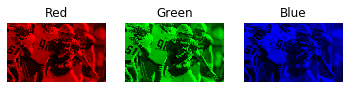

In [20]:
# Load image file into array
# Display image as Matplotlib figure
M = img.imread('Reynolds.jpg')

# Get dimensions of array
x, y, c = M.shape

# Create red component of M by zeroing out green and blue values
M_r = 255 * np.ones((x, y, c), dtype ='uint8')
M_r[0:x, 0:y, 0:c] = M[0:x, 0:y, 0:c]  # copy array M, then modify
M_r[:, :, 1:3] = 0

# Create green component of M by zeroing out red and blue values
M_g = 255 * np.ones((x, y, c), dtype ='uint8')
M_g[0:x, 0:y, 0:c] = M[0:x, 0:y, 0:c]   # copy array M, then modify
M_g[:, :, 0] = 0
M_g[:, :, 2] = 0

# Create blue component of M by zeroing out red and green values
M_b = 255 * np.ones((x, y, c),  dtype ='uint8')
M_b[0:x, 0:y, 0:c] = M[0:x, 0:y, 0:c]   # copy array M, then modify
M_b[:, :, 0:2] = 0

# Create figure with 3 subplots
fig = plt.figure()

# Subplot 1: red
ax = fig.add_subplot(1,  3,  1)
ax.imshow(M_r)
ax.set_title("Red")
ax.axis("off")

# Subplot 2: green
ax = fig.add_subplot(1,  3,  2)
ax.imshow(M_g)
ax.set_title("Green")
ax.axis("off")

# Subplot 3: blue
ax = fig.add_subplot(1,  3,  3)
ax.imshow(M_b)
ax.set_title("Blue")
ax.axis("off")

# Display figure
fig.show()

__Problem 8.__
Load the image `calico_cat_in_greece.jpg` (in the same folder as this notebook) into an array `S`. Using what that you've learned today, make an image with the cat picture surrounded by a black border. One way to do this is to make a larger, all black image, and then set the central pixels equal to the cat picture. Display your new image.

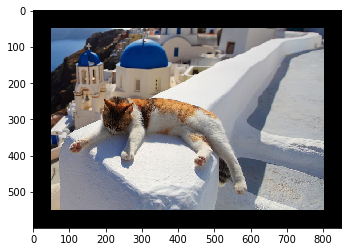

In [21]:
# Load image into array
S = img.imread('calico_cat_in_greece.jpg')

# Get dimensions of array
x, y, c = S.shape

# Create new 3D array to represent image with 100 more pixels
# in the horizontal and vertical directions
S_new = np.zeros((x + 100, y + 100, c), dtype='uint8')

# Copy the values of S into S_new
S_new[50:x + 50, 50:y + 50, 0:3] = S[:,:,:]

# Display resulting image
plt.imshow(S_new) 